# <center><font color = "green"> Tips dataset </font></center>

<img src="Images/tipping.PNG" width="600" height="600" />

### <center><font color = "green"> Author: Barry Clarke </font></center>
### <center><font color = "green"> Course: Fundamentals of Data Analysis (Sept 2019) </font></center>

## Table of contents
1. [Tips dataset description](#1.-Tips-dataset-description)<br>
1.1 [Using_pandas_and_matplotlib](#1.1-Using-pandas-and-matplotlib)<br>
1.2 [Adding seaborn to the analysis](#1.2-Adding-seaborn-to-the-analysis)<br>
1.2.1 [distplot()](#1.2.1-distplot())<br>
2. [Regression](#2.-Regression)

In [1]:
# Load libraries required for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Tips dataset description

### 1.1 Using pandas and matplotlib
We can explore the tips dataset using pandas and matplotlib.

In [2]:
# Read in the tips dataset
data = pd.read_csv('Data/tips.csv')

It is generally good practice to have a look at the head and tail of the dataset to confirm the structure at the top and the bottom of the dataset are the same. It also helps give a visual of what is contained within the dataset.

In [3]:
# View the head of the dataset
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# View the tail of the dataset
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


This tips dataset consists of 244 rows of 7 variables: Total bill, Tip, Gender(Sex), Smoker(Y/N), Day, Time and Size (Party size), and 244 records of each variable. Some variables are numbers, others are strings, while one (smoker) is a boolean entry.<br>

In [5]:
# Summarize the totals for each day
data.groupby(['day']).sum()

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


Looking at the above summary we can see that the data is collected across 4 days, thursday through Sunday. We can see that Saturday and Sunday are the busiest, with Friday being particularly quiet compared to the other 3 days. However, as shown below, this may not be an entirely accurate way of reading the data

In [6]:
# Refine the totals to include meal time each day
data.groupby(['day', 'time']).sum()

total_bill     tip  size
day  time                            
Fri  Dinner      235.96   35.28    26
     Lunch        89.92   16.68    14
Sat  Dinner     1778.40  260.40   219
Sun  Dinner     1627.16  247.39   216
Thur Dinner       18.78    3.00     2
     Lunch      1077.55  168.83   150

By including the time (meal time) variable, we can see that the are no records available for Saturday lunch or Sunday lunch, and only 1 record for Thursday dinner. We should be aware of this whenever drawing any conclusions based on days of the week, as this could skew overall data for each day.

Let's compare the first two columns data (Total bill and tip)

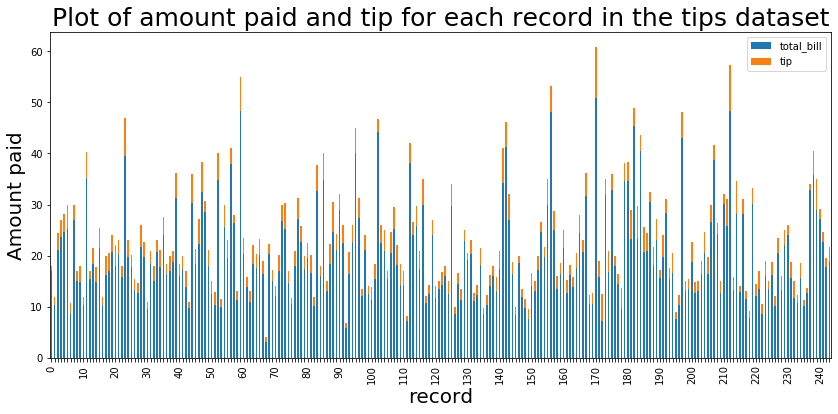

In [7]:
# Create a dataset with only total bill and tip included
data2 = data[["total_bill", "tip"]]
# [2] Adjust the output plot sizes to be full page width
plt.rcParams['figure.figsize'] = (14,6)
# Plot a stacked bar graph to show the total bill and the amount of tip for each record
ax = data2.plot.bar(stacked=True)
# Adding plot titles and axis labels, with font size adjustments
plt.title('Plot of amount paid and tip for each record in the tips dataset', size=25)
plt.xlabel('record', size=20)
plt.ylabel('Amount paid', size=20)
# [3] Adjust the x-axis ticks to only display every 10th tick label
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
      t.set_visible(False)

The above plot helps us visualise the tip size in relation to the total bill. This is useful, as a starting point to understaing the data. However, it is still difficult to extract any great detail from this plot. An improved view would be to concentrate on the percentage tip that is given in each case

Text(0, 0.5, 'Tip (% of total bill)')

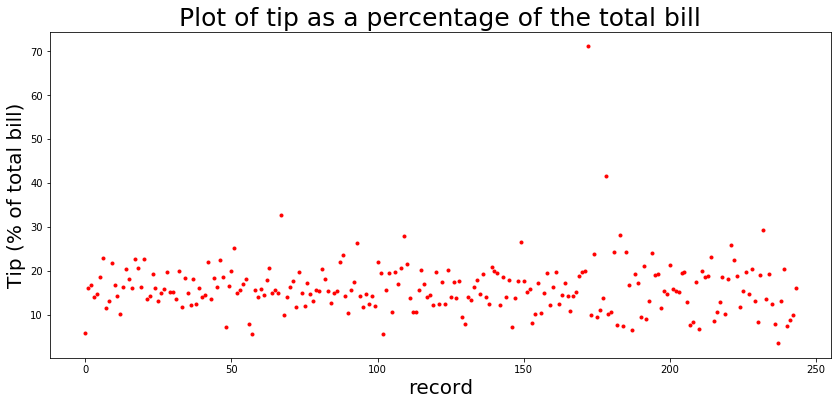

In [8]:
# Calculate the tip, expressed as a percentage of the bill
avetip = data["tip"]/data["total_bill"]*100
plt.plot(avetip, 'r.')
# Adjust the output plot sizes to be full page width
plt.rcParams['figure.figsize'] = (14,6)
# Add plot titles and axis labels, with font size adjustments
plt.title('Plot of tip as a percentage of the total bill', size=25)
plt.xlabel('record', size=20)
plt.ylabel('Tip (% of total bill)', size=20)

This plot adds a little more detail to the first plot, helping us more easily see the tip as a percentage of the bill for each transaction. We can now say that tips mostly range from roughly 10% to 25% of the total bill

In [9]:
# Complete a statistical summary of the dataset
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


We can see that the mean total bill is 19.78, with the median 17.79. This tells us that eventhough the average total bill is 19.78, more than 50% of the 244 records are below this average total bill

In [10]:
# Check for what percentage of records are below the mean
data2 = data[data.total_bill<19.78]
data2.count()
records=(data2.total_bill.count()/data.total_bill.count())*100
records

59.42622950819673

This shows that 60% of total_bills were below the mean total_bill value of 19.78. So, a heavier weight of transactions are below the mean ie 60% of tips are below the average tip.<br>
Another thing to notice is the std dev of the total bill is 8.9, whereas the std dev of the tip is only 1.38. This may appear like a big difference, however, for data relating to tip, it is very often more beneficial to look at tip in terms of percentage of total bill. This gives us good reason to consider the tip in terms of percentage total_bill rather than actual tip value.

In [11]:
# Insert a new column into the dataset for the percentage tip of total bill
data['tip_percentage'] = data["tip"]/data["total_bill"]*100

In [12]:
# View the head of the dataset with tip precentage included as a new variable
data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [13]:
# Complete a summary statistical analyses with tip percentage included
data.describe()

,total_bill,tip,size,tip_percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


From the new column, "tip_percentage", we can see that the average tip is 16% of the total bill, with a std dev of 6.1.Comparing the std dev of the tip percentage with that of the total bill (8.9) would be a better way of comparing than the tip value std dev

In the above code and plots, we utilised the matplotlib library to create the plots. These plots are useful and informative. By adding the Seaborn library, we can enhance the plot stlying and add some quick, additional features that will achieve improved plots and understanding for the analyst with very efficient code

### 1.2 Adding seaborn to the analysis

In [14]:
# The tips dataset is in-built in the seaborn package, so we can open it using the load_dataset() function.
tips = sns.load_dataset("tips")

#### [1.2.1 distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html)

A distplot is used to examine a univariate distribution of observations ie. single variable

Text(0, 0.5, 'Probability of tip')

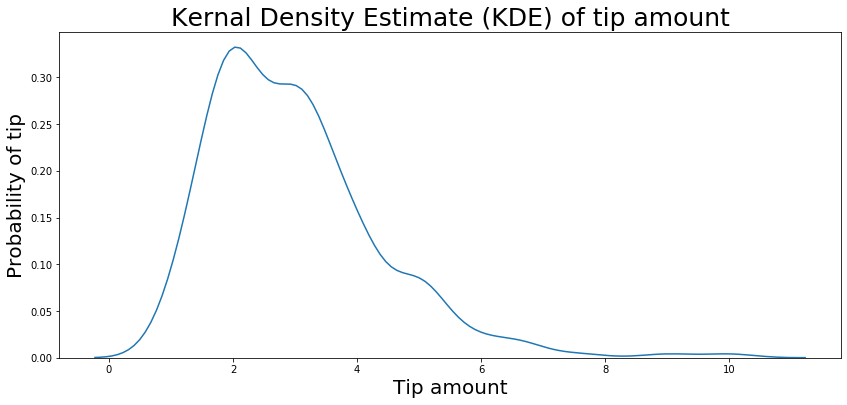

In [15]:
# [4] https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.distplot(tips['tip'],hist=False, bins=10)
plt.title('Kernal Density Estimate (KDE) of tip amount', size=25)
plt.xlabel('Tip amount', size=20)
plt.ylabel('Probability of tip', size=20)

KDE is a way to estimate the probability density function of a continuous random variable. It is used when you need to know the distribution of the variable. From this, we can say that the most of the tips are between 2 and 4, and it's distribution looks as above

Now we can use seaborn to visualise some data containing two variables

In [16]:
# Insert a new column into the dataset for the percentage tip of total bill
tips['tip_percentage'] = tips["tip"]/tips["total_bill"]*100

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


#### [1.2.1 relplot()](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

Text(0.5, 1, 'Tip percentage Vs Total bill')

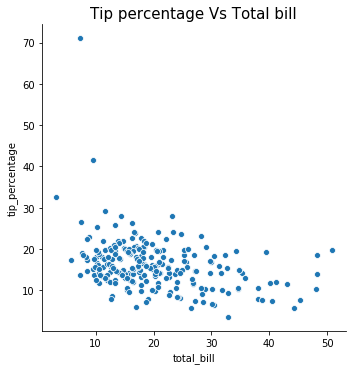

In [18]:
# Plot total_bill vs tip_percentage using the relplot function
sns.relplot(x="total_bill", y="tip_percentage", data=tips)
plt.title('Tip percentage Vs Total bill', size=15)

From the above plot we can see that there are two major outliers, both of which gave over 40% tip. We will omit these for now, so as to focus more on the common data

In [19]:
# Omit any data where tip_percentage is greater than 40%
tips2 = tips[tips.tip_percentage<40]

Now, 'tips2' dataframe will not contain the two outliers, however 'tips' wil contain the outliers

#### [1.2.2 regplot()](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial)

Text(0.5, 1.0, 'Tip percentage')

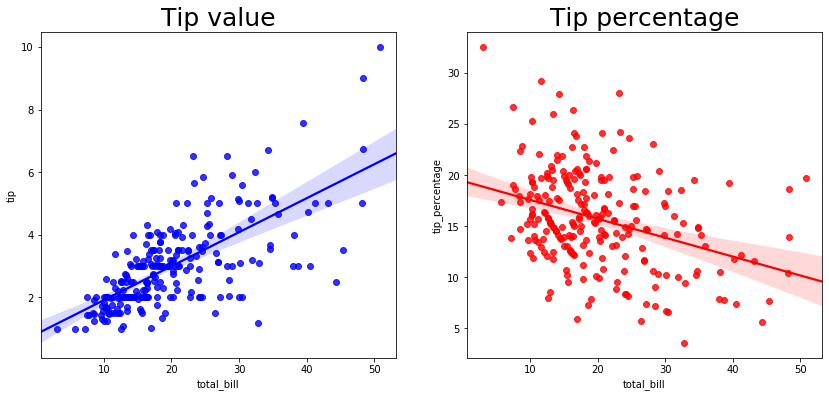

In [20]:
# Prepare to plot 2 plots side by side
plt.subplot(1,2,1)
# Use the regplot function to visualise the linear relationship between Total bill and tip value 
# [5] https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial
sns.regplot(x="total_bill", y="tip", data=tips2, color="b", fit_reg=True)
plt.title('Tip value', size=25)
plt.subplot(1,2,2)
# Use the regplot function to visualise the linear relationship between Total bill and tip percentae
sns.regplot(x="total_bill", y="tip_percentage", color='r', data=tips2, fit_reg=True)
plt.title('Tip percentage', size=25)

One interesting point to note from the above two plots is that, as the total_bill rises in value so too does the **tip value**, which would be expected, however, the **tip percentage** of the bill falls.

Another way to view the percentage tip would be to to use the relplot function with the added semantic of using hue to highlight the size of the party, as below. 

Text(0.5, 1, 'Tip percentage Vs Total bill')

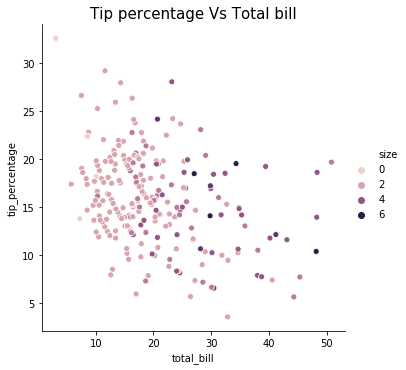

In [21]:
# Use relplot function with hue representing party size
sns.relplot(x="total_bill", y="tip_percentage", hue="size", data=tips2)
plt.title('Tip percentage Vs Total bill', size=15)

This means that customers are more likely to give a larger tip percentage with lower total_bills. This could be an interesting subject of focus for further analysis. For instance, a waitor may benefit more from serving 4 individuals than a table of 4<br>
<font color = 'red'>Note:</font> Notice how we have moved from plotting one variable, to two variables, and now are plotting using 3 variables

Seaborn is a very code efficient way of visualising the distribution of data within categories. For example, with the tips dataset, we can easily observe how the tip_percentage (as calculated and amended above to the dataset) distrubutions vary acorss different categories. Firstly, lets look at the overall figures for the data, as it is always a good idea to stand back and observe more macro statistics prior to delving deep into the data

In [22]:
# Select only certain columns to best sumarize the overall figures
tips3 = tips.loc[:, ['total_bill', 'tip', 'day','size']]
# Group the total figures based on day and meal time
tips3.groupby(['day']).sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


Looking at the above summary we can see that the data is collected across 4 days, thursday through Sunday. We can see that Saturday and Sunday are the busiest, with Friday being particularly quiet compared to the other 3 days. However, as shown below, this may not be an entirely accurate way of reading the data

In [23]:
# Select only certain columns to best sumarize the overall figures
tips4 = tips.loc[:, ['total_bill', 'tip', 'day', 'time', 'size']]
# Group the total figures based on day and meal time
tips4.groupby(['day', 'time']).sum()

total_bill     tip   size
day  time                             
Thur Lunch      1077.55  168.83  150.0
     Dinner       18.78    3.00    2.0
Fri  Lunch        89.92   16.68   14.0
     Dinner      235.96   35.28   26.0
Sat  Lunch          NaN     NaN    NaN
     Dinner     1778.40  260.40  219.0
Sun  Lunch          NaN     NaN    NaN
     Dinner     1627.16  247.39  216.0

By including the time (meal time) variable, we can see that the are no records available for Saturday lunch or Sunday lunch, and only 1 record for Thursday dinner. We should be aware of this whenever drawing any conclusions based on days of the week, as this could skew overall data for each day.

#### [1.2.3 barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)

In the below barplot, we can see the average (mean by default) total_bill with acompanying estimated error shown by the narrow black line.

Text(0.5, 1.0, 'Total bill amount per day')

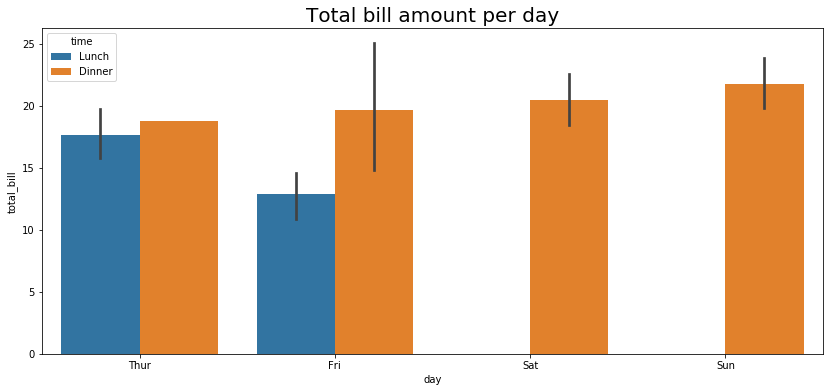

In [24]:
# Use the barplot function to observe the average total_bill acroos the categories of days and mealtimes
sns.barplot(x="day", y="total_bill", hue="time", data=tips2)
plt.title('Total bill amount per day', size=20)

Notice how there is no error bar on the Thur dinner bar - this is because there is only 1 record for Thur dinner, hence no average or error. Also, no data exists for Sat or Sun lunchtime.This further highlights the limited data we have in this dataset regarding understanding overall customer data to the restaurant. For me, this is an important fact to be aware of when drawing general conclusions on the dataset

#### [1.2.4 boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)

A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.[5]

Text(0.5, 1.0, 'Tip percentage distribution per day')

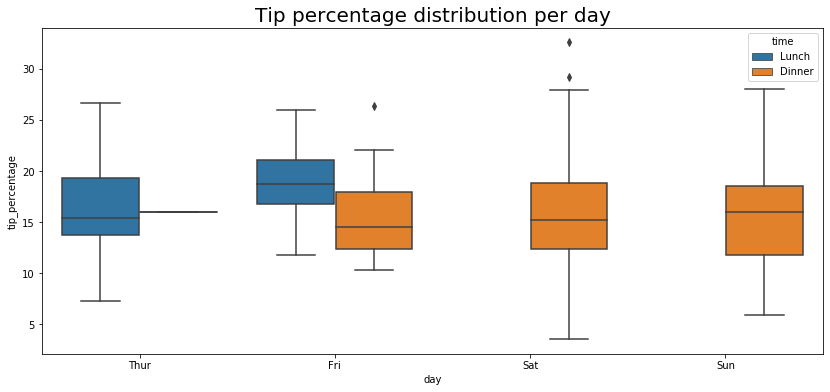

In [25]:
# Use boxplot function to compare tip percentage across days and meal times
sns.boxplot(x="day", y="tip_percentage", hue="time", data=tips2)
plt.title('Tip percentage distribution per day', size=20)

From this plot we can say that gerenally, lunch tip is a slightly higher percentage however from the previous data we can also see that lunch total_bill tends to be lower. This fits with our earlier observation that lower total bills tend to have higher tip percentages.<br>
<font color = "Red">Aside:</font> Remember, we are omitting outliers. If we were to include these, our boxplot would look like below. When included in the the data, the outliers help us understand 2 things:<br>
1. Both outliers occur at Sunday Dinner time - perhaps Sunday Dinner is the best time to receive irregularly large tips
2. When included, the scale of the boxplot is increased, hence making it less focused on the bulk of the data

Text(0.5, 1.0, 'Tip percentage distribution per day')

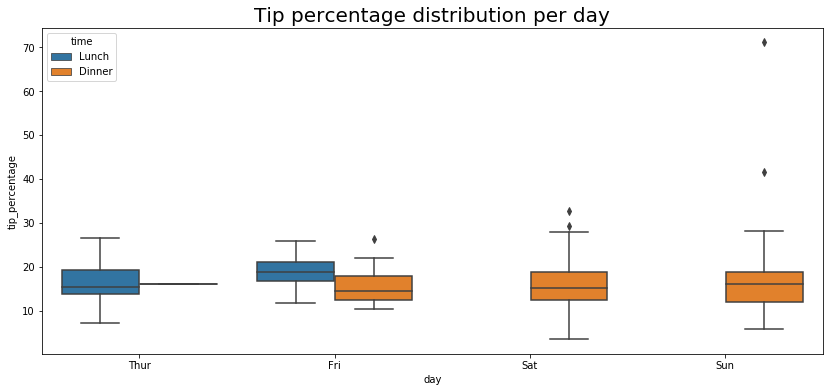

In [26]:
# Use boxplot function to compare tip percentage across days and meal times, including outliers
sns.boxplot(x="day", y="tip_percentage", hue="time", data=tips)
plt.title('Tip percentage distribution per day', size=20)

So, from the perspective of the tip-eager waitor, there is the balancing of getting a better percentage tip per transaction at lunchtimes, with possibliby getting higher value tips but more irregularly Dduring the sunday dinner period. A quandry indeed!!

#### [1.2.5 Violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

This plot is used to visualize the distribution of the data and its probability density. This chart is a combination of a Box Plot and kernal Density Estimate, both seen above. So if you need to find the frequency distribution along with box plot than use violin plot.[4]

Text(0.5, 1.0, 'Total bill per day')

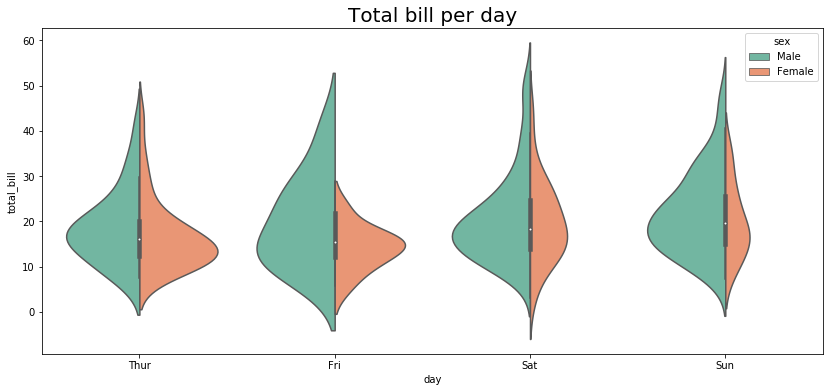

In [27]:
# Create a violin plot of total bill per meal time period, splitting the data based on sex
# [7] https://seaborn.pydata.org/generated/seaborn.violinplot.html
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="Set2", split=True, scale="count")
plt.title('Total bill per day', size=20)

From the above plot, we can compare the value and distribution of total bill for Male and Female

## 2. Regression

**Finding the best fit line**

Already touched on in [1.2.2 regplot()](http://localhost:8888/notebooks/Tips%20dataset.ipynb#1.2.2-regplot()), regression is used to best fit a line to a set of data. To better understand and explain regression, we will use the [polyfit()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) function in numpy to calculate the slope and y-intercept of the best fit line and then use these to draw the best fit line.<br>
The polyfit() function is used to calculate the slope (m) and the y-intercept (c) that is used in the below equation to represent the best fit line for the set of data given
<center><i><b>y = mx +c</i></b></center>

In [28]:
# Calculate the m (slope) and c (y-intercept) for the best fit line 
# Define x to be the data contained in total bill
x = tips['total_bill']
# Define y to be the data contained in tip
y = tips['tip']

# Use the polyfit() function to calculate the slope and y-intercept for the best fine line
result = np.polyfit(x, y, 1)

print("The best m (slope) and c (y-intercept) are:", result)

The best m (slope) and c (y-intercept) are: [0.10502452 0.92026961]


Using the m and c just calculated, we can plot the best fit line

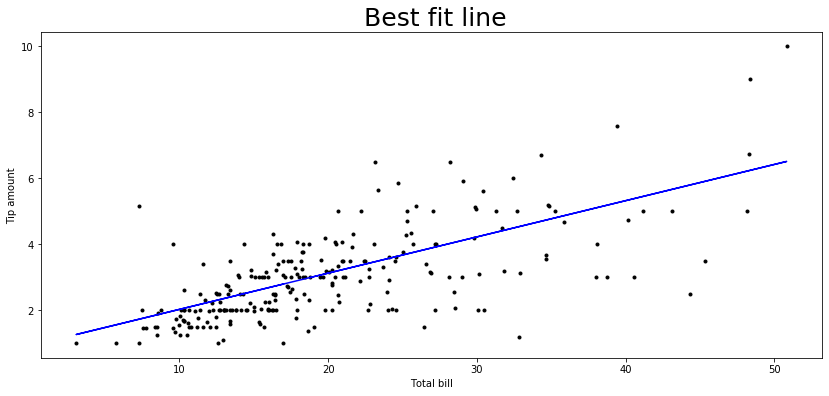

In [29]:
# Plot the data and the best fit line on the same plot
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, 0.11 *x + 0.92, 'b-', label='Best fit line')

plt.title(' Best fit line', size=25)
plt.xlabel('Total bill')
plt.ylabel('Tip amount')

plt.show()

**Note:** In comparing this to the regplot obtained in 1.2.2 above, we see we have the same result

Text(0.5, 1.0, 'Tip value')

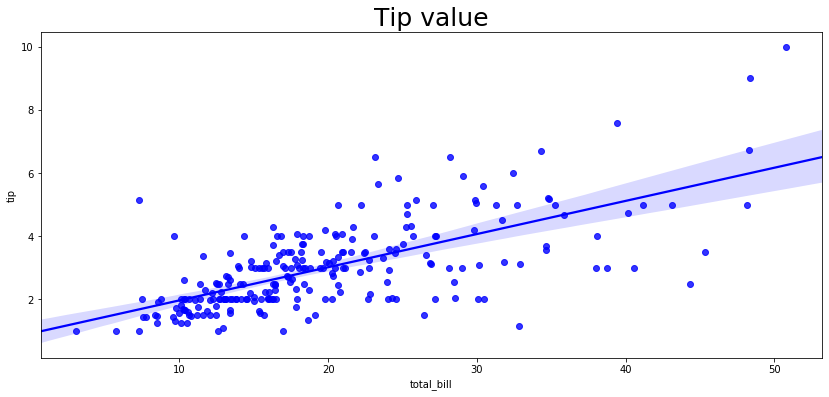

In [30]:
# Use the regplot function to visualise the linear relationship between Total bill and tip value
sns.regplot(x="total_bill", y="tip", data=tips, color="b", fit_reg=True)
plt.title('Tip value', size=25)

The shaded area either side of the line represents a 95% confidence interval for this regression<br>
<font color = 'red'>**Notice**</font> how this is another good example of the efficiency of the seaborn package

**Calculating the cost**

Using below equation we calculate the "cost" value of how the best fit line represents the data given. The smaller the cost, the closer the line fits to the data. The closer the best fit line is to the data, the more reliable it will be for making predictions about what tip should be expected based on the the total bill

$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$

In [31]:
# Calculate the cost of the best fit line for the data
cost = lambda m,c: np.sum([(y[i] - m *x[i] - c)**2 for i in range(x.size)])

print("The cost with m = 0.10502452 and c = 0.92026961 is:", cost(0.10502452, 0.92026961))

The cost with m = 0.10502452 and c = 0.92026961 is: 252.7887438507767


By observation of the regression plot and the calculation of the cost of the best fit line, we can see that the best fit line is not a very reliable indicator of the expected tip from a given total bill. For example, for an expected total bill of 30, we can compare the prediction of what tip amount would be achieved and compare this to the actual data recorded.

In [32]:
# Using the best fit results, predict what tip amount is expected from a bill of 30
# Using y = mx + c
m = 0.10502452
c = 0.92026961
tip = m*30 + c
tip

4.07100521

In [33]:
# View only total bill and tip values for total bill between 29 and 31
tips5 = tips.loc[:, ['total_bill', 'tip']]
tips5.loc[ tips5.loc[:, 'total_bill'].between(29, 31), : ]

,total_bill,tip
44,30.40,5.60
116,29.93,5.07
125,29.80,4.20
155,29.85,5.14
187,30.46,2.00
210,30.06,2.00
219,30.14,3.09
239,29.03,5.92


So, although the best line fit predicts a tip of 4 from a total bill of 30, the data recorded shows that there is a very large variance of tips, ranging from 2 to 5.92
This shows that there is not a very linear relationship between the total bill and the tip amount. Regarding this relationship, one interesting point worth re-iterating from [1.2.2 regplot()](http://localhost:8888/notebooks/Tips%20dataset.ipynb#1.2.2-regplot()) is that the percentage tip actually falls with increasing total bill

## References

1. https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#2.4.2.2-Table-of-Contents-Support
2. https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib 
3. https://stackoverflow.com/questions/56095446/pandas-plot-bar-show-every-nth-xlabel
4. https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
5. https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial
6. https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot
7. https://seaborn.pydata.org/generated/seaborn.violinplot.html